<a href="https://colab.research.google.com/github/MSR806/DL/blob/master/DL_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Funtion

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors

$S_{w,b}(x) = \frac{1}{1+e^{-(wx + b)}}$

In [47]:
def sigmoid(x, w, b):
  return 1/(1+np.exp(-(w*x + b)))

In [48]:
sigmoid(1,3,5)

0.9996646498695336

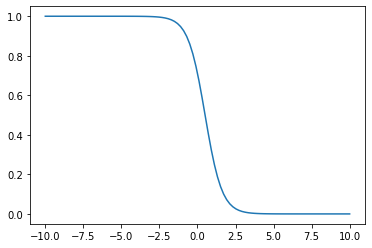

In [49]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = 0.9    #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
# X will iterate and gives a nparray as output
plt.plot(X,Y)
plt.show() 

$S_{w_1,w_2,b}(x_1,x_2) = \frac{1}{1+e^{-(w_1x_1+ w_2x_2 + b)}}$

In [50]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [51]:
w1 = 0.5
w2 = 0.5
b = 0

X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

In [52]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red','yellow', 'green'])

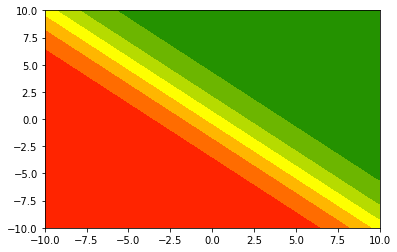

In [53]:
plt.contourf(XX1,XX2,Y, cmap = my_cmap)
plt.show()

In [54]:
Y.shape

(100, 100)

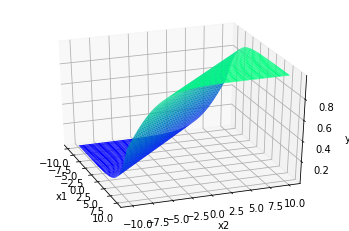

In [55]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(XX1, XX2, Y, cmap='winter')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 360-20)
plt.show()

#Compute Loss for a given Dataset

In [56]:
w_unkwn = 0.5
b_unkwn = 0.25

X = np.random.random(25) * 20 -10
Y = sigmoid(X, w_unkwn, b_unkwn)

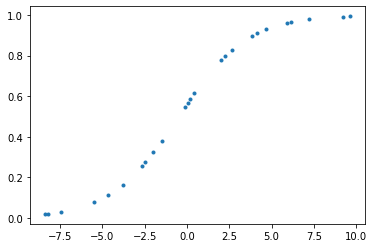

In [57]:
plt.plot(X, Y, '.')
plt.show()

In [58]:
def cal_loss(X, Y, w_est, b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(x, w_est, b_est))**2
  return loss

In [59]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [60]:
Loss.shape

(101, 101)

In [61]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = cal_loss(X,Y, WW[i, j], BB[i,j])

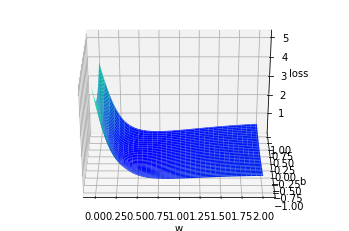

In [62]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(WW, BB, Loss, cmap='winter')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.view_init(30, 360-90)
plt.show()

In [63]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [64]:
print(i,j)

63 25


In [65]:
print(WW[i,j], BB[i,j])

0.5 0.26


#Class for Sigmoid Neuron

In [66]:
class SigmoidNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self, x):
    return np.dot(self.w, x) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (y_pred - 1) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (y_pred - 1)

  def fit(self, X, Y, epochs=1, lr=1, initialise= True):
    if initialise:
      self.w = np.random.randn(X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw = 0
      db = 0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -= lr*dw
      self.b -= lr*db
    

#Fit for toy data

In [106]:
X = np.asarray([[2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2,-4], [1,5]])
Y = [1, 1, 1, 0, 0, 0]

In [107]:
sn = SigmoidNeuron()

In [108]:
X1.size

100

In [92]:
def sn_plot(X,Y,sn,ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))

  ax.contourf(XX1 ,XX2, YY, cmap = my_cmap,)
  ax.scatter(X[:, 0],X[:, 1], c = Y, cmap = my_cmap)
  ax.plot()

[ 0.25377376 -0.61971395] -0.001817556805803475
[-0.25042169 -1.08086514] -0.03593219963271854
[-0.82349104 -1.00326561] -0.08302544892031163
[-1.33851356 -0.85321031] -0.04049297664279648
[-1.48359979 -0.78557931] -0.024565925177541463
[-1.584789   -0.70588612] -0.024466665452235165
[-1.67384003 -0.5852855 ] -0.04156267927446394
[-1.7745845 -0.3656057] -0.0886795298912439
[-1.91262815  0.01973713] -0.1820154450382614
[-2.01939364  0.21244818] -0.2152980762286072
[-2.09935516  0.33766944] -0.18721634432312367
[-2.16008369  0.51441506] -0.11343565866359508
[-2.21452448  0.7830347 ] 0.025384103859037513
[-2.3725592   0.76472039] 0.17193866314231704
[-2.47273115  0.86390743] 0.30564152480834356
[-2.60336948  0.83366309] 0.4191853989332615
[-2.67726069  0.92952019] 0.5228011976918581
[-2.78529838  0.8974163 ] 0.6106562843012932
[-2.8471788   0.97100712] 0.6919861052388709
[-2.93114756  0.95973606] 0.7621626789827819
[-2.99005396  1.00111282] 0.8271431312313253
[-3.05474005  1.01029767] 0.8

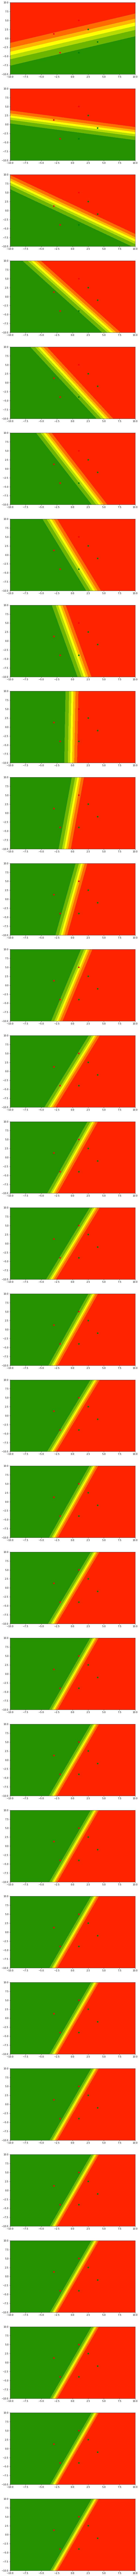

In [114]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*7))
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N,1,i+1)
  sn_plot(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.7, False)


#Load Data